Collecting all the necessary functions form packages

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.color import rgb2hsv, hsv2rgb
from skimage import io

Finding and showing the example image

(-0.5, 1079.5, 719.5, -0.5)

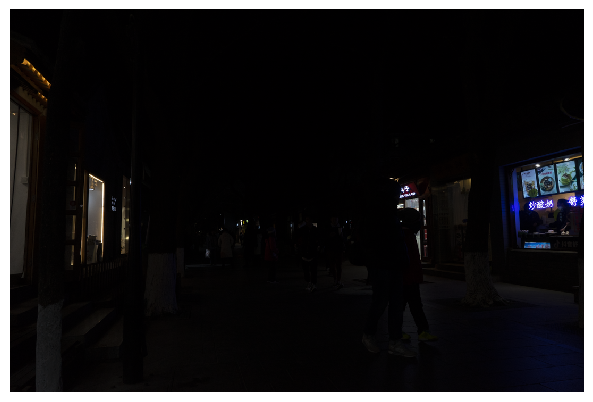

In [101]:
in_dir = "C:/Users/shaia/Pictures/Low light images/"
im_name = "6000.png"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
plt.axis("off")

Extracting the value channel of the corresponding HSV image

In [102]:
im_hsv = rgb2hsv(im_org)
V = im_hsv[:, :, 2]
V = np.uint8(V * 255)

Histogram equalization of the value channel

Text(0.5, 1.0, 'Histogram equalisation of Value channel in image')

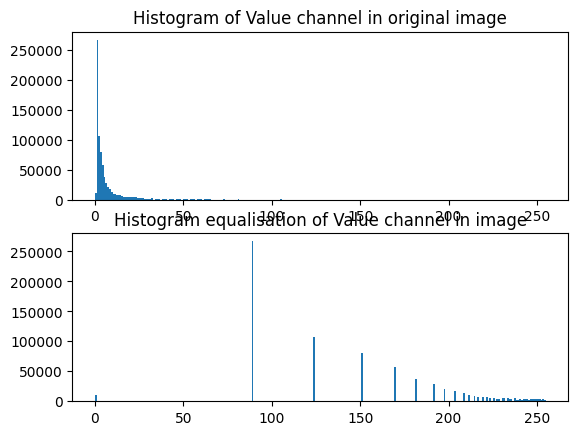

In [103]:
V_hist = cv.equalizeHist(V)

plt.figure()

plt.subplot(2, 1, 1)
plt.hist(V.ravel(), bins = 256)
plt.title("Histogram of Value channel in original image")

plt.subplot(2, 1, 2)
plt.hist(V_hist.ravel(), bins = 256)
plt.title("Histogram equalisation of Value channel in image")

Check for constrast level in image

In [104]:
V_comp = (V_hist < V) * V
V_compMax = np.max(V_comp) / 255

if V_compMax > 0.1 and V_compMax < 0.6:
    th = 0.6
    V_1 = V.copy()
    V_2 = V_hist.copy()
    gamma = 3
elif V_compMax > 0.6 and V_compMax < 1:
    th = 1
    V_1 = V.copy()
    V_2 = V_hist.copy()
    gamma = 2.2
elif V_compMax > 0 and V_compMax < 0.1:
    th = 1
    V_1 = V.copy()
    V_2 = V.copy()
    gamma = 1.6
else:
    th = 1
    V_1 = V_hist.copy()
    V_2 = V_hist.copy()
    gamma = 1.6

Calculate the enhanced image

In [105]:
V_llp = (V_1 / 255 <= th) * V_2
V_op = (V_1 / 255 >= th) * V_2
V_llpup = 255 * ((V_llp / 255) ** (1 / gamma))
V_enh = V_llpup + V_op

Transform the enhanced image back to RGB

(-0.5, 1079.5, 719.5, -0.5)

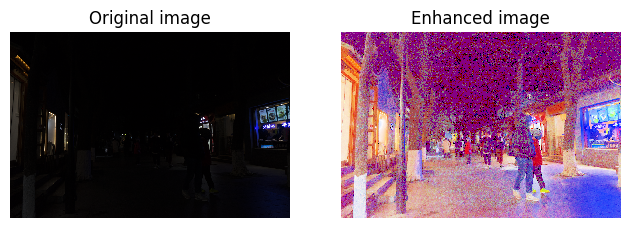

In [106]:
im_hsv[:, :, 2] = V_enh
im_enh = hsv2rgb(im_hsv)
im_enh = np.uint8(im_enh)

plt.figure()

plt.subplot(1, 2, 1)
io.imshow(im_org)
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
io.imshow(im_enh)
plt.title("Enhanced image")
plt.axis("off")

Plotting the histograms

Text(0.5, 1.0, 'Histogram of the enhanced image')

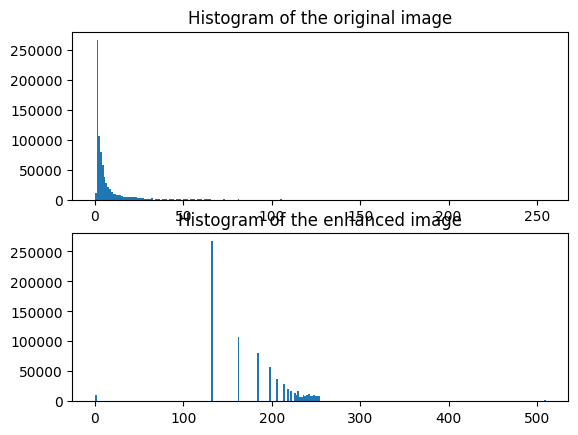

In [107]:
plt.figure()

plt.subplot(2, 1, 1)
plt.hist(V.ravel(), bins = 256)
plt.title("Histogram of the original image")

plt.subplot(2, 1, 2)
plt.hist(V_enh.ravel(), bins = 256)
plt.title("Histogram of the enhanced image")